<a href="https://colab.research.google.com/github/SAHIL9581/car-selling-price-prediction-and-analysis/blob/main/car_selling_price_prediction_and_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
data = pd.read_csv('car.csv') # read the data from csv file that you have locally.
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import seaborn as sns
import plotly.express as px

In [ ]:
data

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [ ]:
data.describe()


,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [ ]:
import plotly.express as px

fig = px.histogram(data,
                   x='Year',
                   marginal='box',
                   nbins=16,
                   title='Distribution of Year',
                   color_discrete_sequence=['orange'])

fig.update_layout(bargap=0.1)
fig.show()


In [ ]:


fig = px.histogram(data,
                   x='Selling_Price',
                   marginal='box',
                   color='Transmission',
                   color_discrete_sequence=['orange', 'grey'],  # Only one list here
                   title='Annual Medical Charges')

fig.update_layout(bargap=0.1)
fig.show()


In [ ]:


fig = px.histogram(data,
                   x='Kms_Driven',
                   marginal='box',
                   color_discrete_sequence=['orange'],
                   title='Annual Medical Charges')

fig.update_layout(bargap=0.1)
fig.show()


In [ ]:
fig = px.scatter(data,
                 x='Kms_Driven',
                 y='Selling_Price',
                 opacity=0.8,
                 color_discrete_sequence=['orange'],
                 title='Kilometers driven vs. Selling Price')
fig.update_traces(marker_size=5)
fig.show()

In [ ]:
fig = px.scatter(data,
                 x='Present_Price',
                 y='Selling_Price',
                 opacity=0.8,
                 color_discrete_sequence=['orange'],
                 title='Kilometers driven vs. Selling Price')
fig.update_traces(marker_size=5)
fig.show()

In [ ]:
fig = px.scatter(data,
                 x='Year',
                 y='Selling_Price',
                 opacity=0.8,
                 color_discrete_sequence=['orange'],
                 title='Kilometers driven vs. Selling Price')
fig.update_traces(marker_size=5)
fig.show()

In [ ]:
data.Selling_Price.corr(data.Year)

data.Selling_Price.corr(data.Present_Price)

data.Selling_Price.corr(data.Kms_Driven)

np.float64(0.029187090674291236)

Text(0.5, 1.0, 'Correlation Matrix')

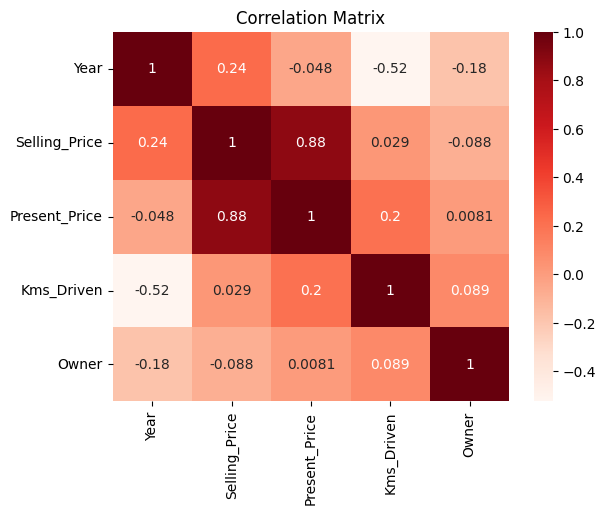

In [ ]:
numeric_data = data.select_dtypes(include=['number'])

sns.heatmap(numeric_data.corr(), cmap='Reds', annot=True)
plt.title('Correlation Matrix')

In [ ]:
fig = px.scatter(data,
                 x='Present_Price',
                 y='Selling_Price',
                 opacity=0.8,
                 color_discrete_sequence=['orange'],
                 title='Kilometers driven vs. Selling Price')
fig.update_traces(marker_size=5)
fig.show()

In [ ]:
def estimate_selling_price(present_price, w, b):
    return w * present_price + b

In [ ]:
w = 4
b = 50
estimate_selling_price(12.5,w,b)

100.0

In [ ]:
present_prices = data.Present_Price
present_prices

,Present_Price
0,5.59
1,9.54
2,9.85
3,4.15
4,6.87
...,...
296,11.60
297,5.90
298,11.00
299,12.50


In [ ]:
data.Selling_Price

,Selling_Price
0,3.35
1,4.75
2,7.25
3,2.85
4,4.60
...,...
296,9.50
297,4.00
298,3.35
299,11.50


In [ ]:
estimated_selling_prices = estimate_selling_price(present_prices, w, b)
estimated_selling_prices

,Present_Price
0,72.36
1,88.16
2,89.40
3,66.60
4,77.48
...,...
296,96.40
297,73.60
298,94.00
299,100.00


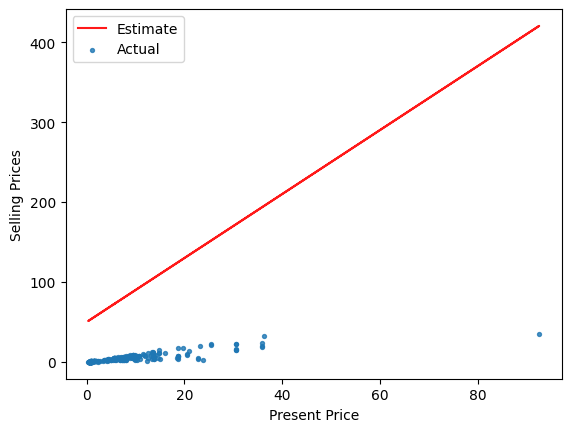

In [ ]:
plt.plot(present_prices, estimated_selling_prices, 'r', alpha=0.9);

target = data.Selling_Price
plt.scatter(present_prices, target, s=8,alpha=0.8);
plt.xlabel('Present Price')
plt.ylabel('Selling Prices')
plt.legend(['Estimate', 'Actual'])

In [ ]:
model = LinearRegression()


inputs = data[['Present_Price']]
targets = data.Selling_Price
model.fit(inputs,targets)

LinearRegression()

In [ ]:
import numpy as np
model.predict(np.array([[10.8],
                        [12.5],
                        [6.9]]))

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([6.30049697, 7.17914031, 4.28478576])

In [ ]:
predictions = model.predict(inputs)
predictions

array([ 3.60771353,  5.64926719,  5.80949039,  2.86345093,  4.26928029,
        5.79915341,  4.91534157,  5.1685976 ,  5.31331532,  5.3288208 ,
        2.57918397,  6.08342038,  5.8560068 ,  4.70343347,  4.44500896,
        6.29532848,  6.29532848,  6.29532848,  3.34928902,  4.84298271,
        2.76008113,  3.66973542,  4.85848818,  2.50682511,  2.99783168,
        3.29760412,  3.75243126,  4.07287766,  2.76008113,  6.08342038,
        3.80928465,  3.24591921,  4.58972669,  5.86117529,  4.88433063,
        4.71893894,  4.43984047,  1.89694325,  2.66187981,  4.84298271,
        4.78612932,  2.7755866 ,  4.41399802,  4.88433063,  2.10885135,
        6.94138976,  3.24591921,  2.86345093,  4.70343347,  5.52005494,
       16.5392762 , 16.5392762 , 10.93663274, 16.5392762 ,  5.99555604,
        8.49193684,  4.4760199 , 10.30090844,  4.23310086, 19.3044185 ,
       10.33708787,  4.69826498, 19.3044185 , 19.3044185 , 19.44396773,
        4.31062821, 12.68358246, 11.28809008,  7.82003311, 11.52

In [ ]:
targets

,Selling_Price
0,3.35
1,4.75
2,7.25
3,2.85
4,4.60
...,...
296,9.50
297,4.00
298,3.35
299,11.50


In [ ]:
from sklearn.metrics import mean_squared_error as rmse
rmse(targets, predictions)

5.855089487051356

In [ ]:
print(model.coef_)

print(model.intercept_)

[0.51684903]
0.7185274709817686


In [ ]:
w = model.coef_[0]
b = model.intercept_
estimated_selling_prices = estimate_selling_price(present_prices, w, b)
estimated_selling_prices

,Present_Price
0,3.607714
1,5.649267
2,5.809490
3,2.863451
4,4.269280
...,...
296,6.713976
297,3.767937
298,6.403867
299,7.179140


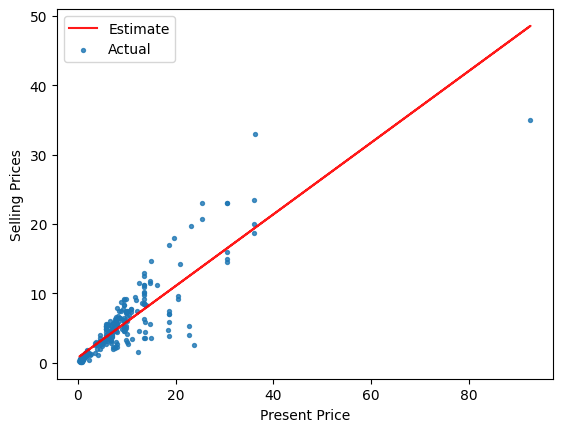

In [ ]:
plt.plot(present_prices, estimated_selling_prices, 'r', alpha=0.9)
target = data.Selling_Price
plt.scatter(present_prices, target, s=8,alpha=0.8)
plt.xlabel('Present Price')
plt.ylabel('Selling Prices')
plt.legend(['Estimate', 'Actual'])

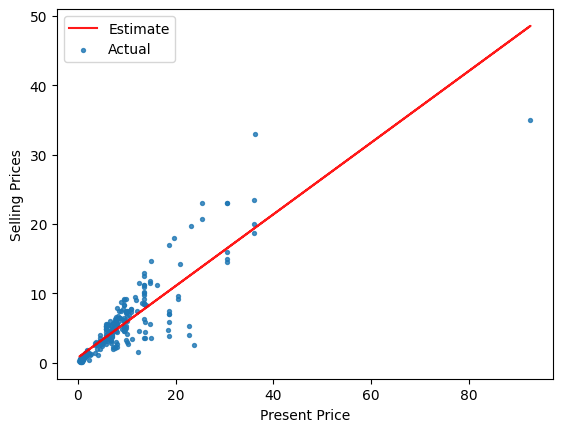

In [ ]:
plt.plot(present_prices, estimated_selling_prices, 'r', alpha=0.9)
target = data.Selling_Price
plt.scatter(present_prices, target, s=8,alpha=0.8)
plt.xlabel('Present Price')
plt.ylabel('Selling Prices')
plt.legend(['Estimate', 'Actual'])

In [ ]:
data = pd.get_dummies(data, columns=['Fuel_Type','Seller_Type','Transmission'], drop_first=True)
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,ritz,2014,3.35,5.59,27000,0,False,True,False,True
1,sx4,2013,4.75,9.54,43000,0,True,False,False,True
2,ciaz,2017,7.25,9.85,6900,0,False,True,False,True
3,wagon r,2011,2.85,4.15,5200,0,False,True,False,True
4,swift,2014,4.60,6.87,42450,0,True,False,False,True


In [ ]:
X = data.drop(['Car_Name','Selling_Price'], axis=1) # inputs
y = data['Selling_Price']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

MAE:  1.2401911938820376
MSE:  3.486877549555715
MSE on training data:  2.8763210780593247
R2 score:  0.8504134196323437


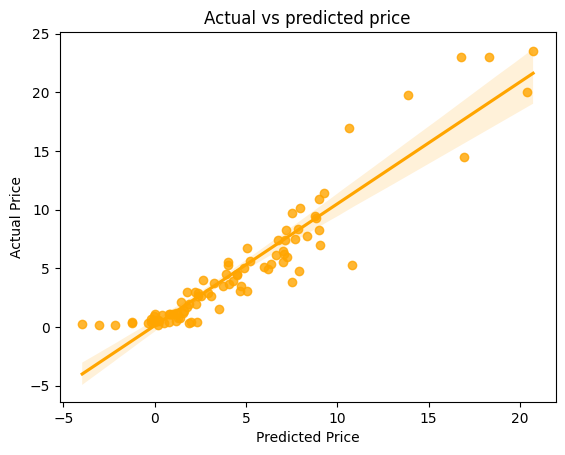

In [ ]:
model = LinearRegression()
model.fit(X_train,y_train)
pred = model.predict(X_test)

pred_train = model.predict(X_train)
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print("MAE: ", (metrics.mean_absolute_error(pred, y_test)))
print("MSE: ", (metrics.mean_squared_error(pred, y_test)))
print("MSE on training data: ", (metrics.mean_squared_error(pred_train, y_train)))
print("R2 score: ", (metrics.r2_score(pred, y_test)))

sns.regplot(x=pred, y=y_test, color='orange')

plt.xlabel("Predicted Price")
plt.ylabel('Actual Price')
plt.title("Actual vs predicted price")
plt.show()